# **Problem Statement :**
This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.

# **Step 1 : Import Libraries**

In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2 : Import Dataset**

In [90]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [91]:
stock.head(5)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [92]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [93]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# **Step 3 : Visualize dataset**

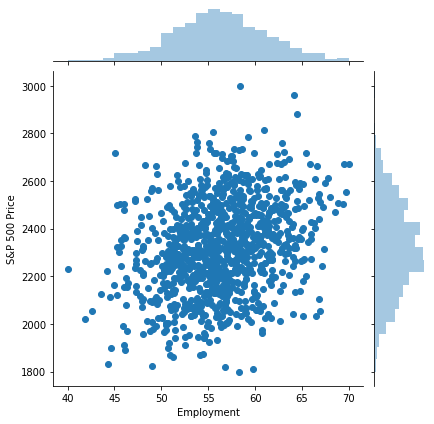

In [94]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock)

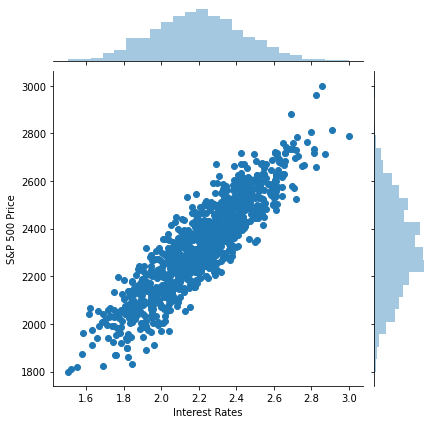

In [95]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

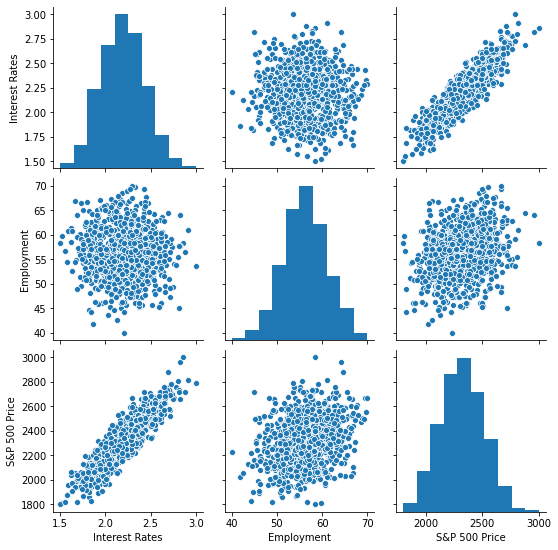

In [96]:
sns.pairplot(stock)

# **Step 4 : Split into Training and Test dataset**

In [97]:
y = stock ['S&P 500 Price']

In [98]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [99]:
X = stock[['Interest Rates', 'Employment']]

In [100]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [102]:
X_train

,Interest Rates,Employment
478,2.286990,58.610391
989,2.171114,61.920053
944,2.292148,51.724763
325,1.942918,57.832487
258,2.304482,62.408022
...,...,...
999,2.180638,46.297034
593,2.176137,52.276457
871,2.203686,56.971592
842,2.355784,58.124730


In [103]:
X_test

,Interest Rates,Employment
573,1.868849,54.707316
580,1.913746,56.475160
756,2.375400,52.763178
902,2.223556,61.209005
849,2.099546,57.811870
...,...,...
112,2.032213,58.226774
400,2.221840,57.926781
955,2.166262,61.843137
931,2.359131,58.383566


# **Step 5 : Train the model**

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
regressor = LinearRegression(fit_intercept = True) # True will not force the line to pass from origin

In [106]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [725.55037983  12.08214174]
Linear Model Coefficients (b) 45.91082329028632


# **Step 6 : Test the model**

In [108]:
y_predict = regressor.predict(X_test)
y_predict

array([2062.83639604, 2116.77111726, 2406.87555359, 2398.74851747,
       2267.72833136, 2592.87615862, 2209.55539098, 2019.83684255,
       1986.8937048 , 2410.25627751, 1955.05471582, 2383.05871937,
       2302.74024112, 2312.22319383, 2075.10349159, 2359.62691639,
       1996.52324507, 2483.27081189, 2203.90708754, 2397.268919  ,
       2520.95532136, 2018.05942537, 2474.06183325, 2169.15968739,
       2416.29529337, 2131.10549166, 2043.78465548, 2296.07166901,
       1950.26223882, 2408.16328266, 2470.38030051, 2671.49748463,
       2527.17319373, 1993.36040136, 2140.9099642 , 2469.87035965,
       2408.47998415, 2350.80472006, 2577.82721275, 2353.19469584,
       2219.89695746, 1972.80727082, 2346.46956498, 2432.2340972 ,
       2394.55819653, 2495.6388187 , 2408.23316252, 2071.51509838,
       2469.97934976, 2618.27285694, 2349.35748549, 2328.01257208,
       2323.41500242, 2252.98291083, 2055.29289946, 2190.49274745,
       2243.76175832, 2726.68865038, 2278.55943727, 2296.20138

In [109]:
y_test

573    2038.478760
580    2034.833667
756    2513.358114
902    2413.405436
849    2228.678985
          ...     
112    2171.367227
400    2395.517804
955    2292.435485
931    2425.346848
673    2235.023281
Name: S&P 500 Price, Length: 300, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

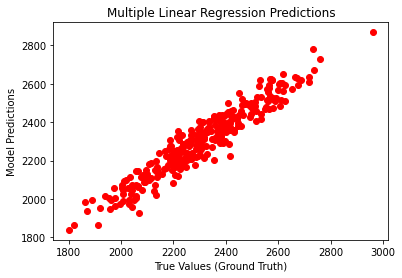

In [110]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

# **Step 7 : Evaluate the model**

In [111]:
k = X_test.shape[1]
n = len(X_test)

In [112]:
n

300

In [113]:
k

2

In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test-y_predict) / y_test))*100

In [115]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  57.241 
MSE = 3276.535907059964 
MAE = 46.60727939922507 
R2 = 0.9129842107387706 
Adjusted R2 = 0.9123982458279205 
MAPE = 2.028426954798591


# **Step 8 - Visualize Test set results**

In [116]:
from mpl_toolkits.mplot3d import Axes3D

In [117]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [118]:
x_surf.shape

(100, 100)

In [119]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()}) 

In [120]:
onlyX.shape

(10000, 2)

In [121]:
fittedY = regressor.predict(onlyX)

In [122]:
fittedY.shape

(10000,)

In [123]:
fittedY = fittedY.reshape(x_surf.shape)

In [124]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

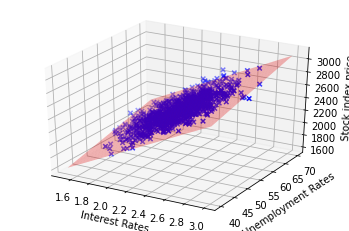

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

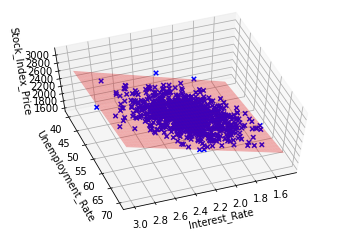

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [127]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,725.550380
Employment,12.082142
